In [ ]:
# Author: Gregory Renteria
# Course: MSCS-634 Advanced Big Data and Data Mining
# Lab 2: Classification Using KNN and RNN Algorithms

Feature Names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class Names:
['class_0' 'class_1' 'class_2']

Dataset Shape:
(178, 13)

First 5 rows of the dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64
Training set size: (142, 13)
Testing set size: (36, 13)
k = 1, Accuracy = 0.7778
k = 5, Accuracy = 0.8056
k = 11, Accuracy = 0.8056
k = 15, Accuracy = 0.8056
k = 21, Accuracy = 0.8056


,k,Accuracy
0,1,0.777778
1,5,0.805556
2,11,0.805556
3,15,0.805556
4,21,0.805556


Radius = 350, Accuracy = 0.7222
Radius = 400, Accuracy = 0.6944
Radius = 450, Accuracy = 0.6944
Radius = 500, Accuracy = 0.6944
Radius = 550, Accuracy = 0.6667
Radius = 600, Accuracy = 0.6667


,Radius,Accuracy
0,350,0.722222
1,400,0.694444
2,450,0.694444
3,500,0.694444
4,550,0.666667
5,600,0.666667


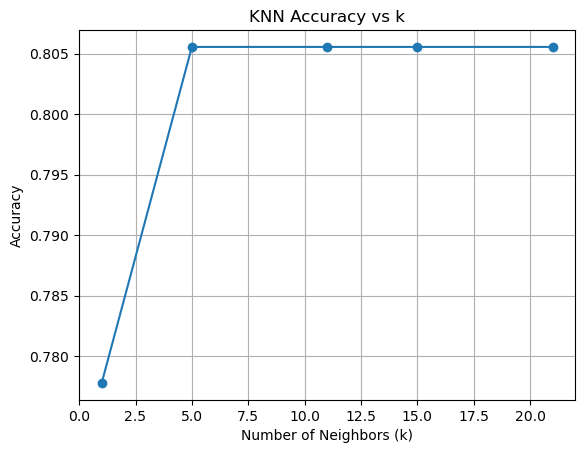

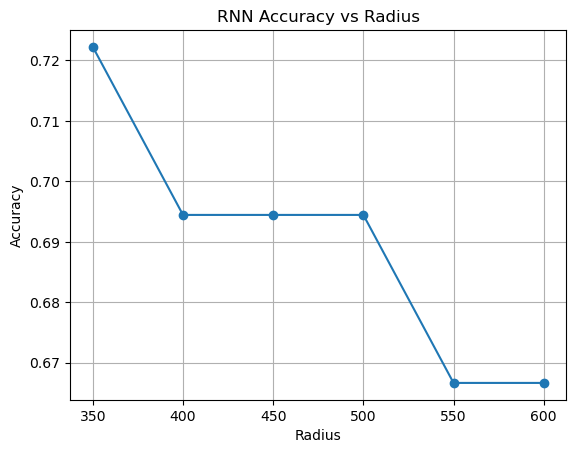

In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

# step 1: load and prepare the dataset

# load the Wine dataset
wine = load_wine()

# convert the DataFrame for easier exploration
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Display basic information
print("Feature Names:")
print(wine.feature_names)

print("\nClass Names:")
print(wine.target_names)

print("\nDataset Shape:")
print(X.shape)

print("\nFirst 5 rows of the dataset:")
display(X.head())

# Check class distribution
print("Class distribution:")
print(y.value_counts())

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class proportions balanced
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# --------------------------------------------------------

# step 2: implement K-Nearest Neighbors (KNN)

# Values of k to test
k_values = [1, 5, 11, 15, 21]

# Store results
knn_results = {}

for k in k_values:
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store result
    knn_results[k] = accuracy
    
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Convert results to DataFrame
knn_df = pd.DataFrame(list(knn_results.items()), columns=["k", "Accuracy"])
knn_df = knn_df.sort_values(by="k")

display(knn_df)

# --------------------------------------------------------

# step 3: implement Radius Neighbors (RNN)

# Radius values to test
radius_values = [350, 400, 450, 500, 550, 600]

# Store results
rnn_results = {}

for r in radius_values:
    # Create RNN model
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    
    # Train the model
    rnn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = rnn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store result
    rnn_results[r] = accuracy
    
    print(f"Radius = {r}, Accuracy = {accuracy:.4f}")

# Convert results to DataFrame
rnn_df = pd.DataFrame(list(rnn_results.items()), columns=["Radius", "Accuracy"])
rnn_df = rnn_df.sort_values(by="Radius")

display(rnn_df)

# --------------------------------------------------------

# step 4: visualize and compare results

# Plot KNN accuracy
plt.figure()
plt.plot(knn_df["k"], knn_df["Accuracy"], marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.show()

# Plot RNN accuracy
plt.figure()
plt.plot(rnn_df["Radius"], rnn_df["Accuracy"], marker='o')
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.title("RNN Accuracy vs Radius")
plt.grid(True)
plt.show()